In [1]:
%cd ../..

c:\Users\tacke\OneDrive\Documents\GitHub\Modern-Time-Series-Forecasting-with-Python-2E-1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import plotly.io as pio
pio.templates.default = "plotly_white"
import pandas as pd
from pathlib import Path
from tqdm.autonotebook import tqdm
from IPython.display import display, HTML
import missingno as msno
import statsmodels.api as sm
# %load_ext autoreload
# %autoreload 2
np.random.seed()
tqdm.pandas()

C:\Users\tacke\AppData\Local\Temp\ipykernel_7328\3457452598.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
os.makedirs("imgs/chapter_3", exist_ok=True)
preprocessed = Path("data/london_smart_meters/preprocessed")
assert preprocessed.is_dir(), "You have to run 02 - Preprocessing London Smart Meter Dataset.ipynb in Chapter02 before running this notebook"

In [4]:
def format_plot(fig, legends = None, xlabel="Time", ylabel="Value", font_size=15, title_font_size=20):
    if legends:
        names = cycle(legends)
        fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_layout(
            autosize=False,
            width=900,
            height=500,
            title={
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
            titlefont={
                "size": 20
            },
            legend_title = None,
            legend=dict(
                font=dict(size=font_size),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                title_text=ylabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            xaxis=dict(
                title_text=xlabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            )
        )
    return fig

# Generate Charts for Trend and Seasonality

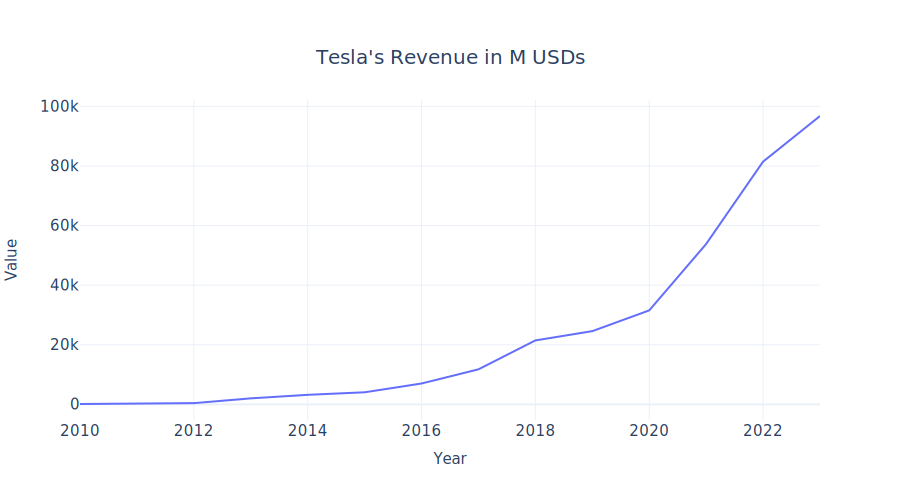

In [34]:
# Create a session object that ignores certificate verification
import requests
from io import StringIO

# Creating a session and disabling SSL verification (be cautious with this approach due to security concerns)
session = requests.Session()
#session.verify = False

url = "https://en.wikipedia.org/wiki/Tesla,_Inc."
r = session.get(url)  # Use the session object here for the request
website = r.text

# Wrap the HTML content in a StringIO object
tesla_revenue = pd.read_html(StringIO(website), encoding="UTF-8")[7][['Year', "Revenue (US$ m)"]]

tesla_revenue = tesla_revenue[tesla_revenue.Year>=2010]
fig = px.line(tesla_revenue, x="Year", y="Revenue (US$ m)", title="Tesla's Revenue in M USDs")
fig = format_plot(fig, xlabel="Year")
fig.write_image("imgs/chapter_3/tesla_revenue.png")
fig.show(renderer="svg")

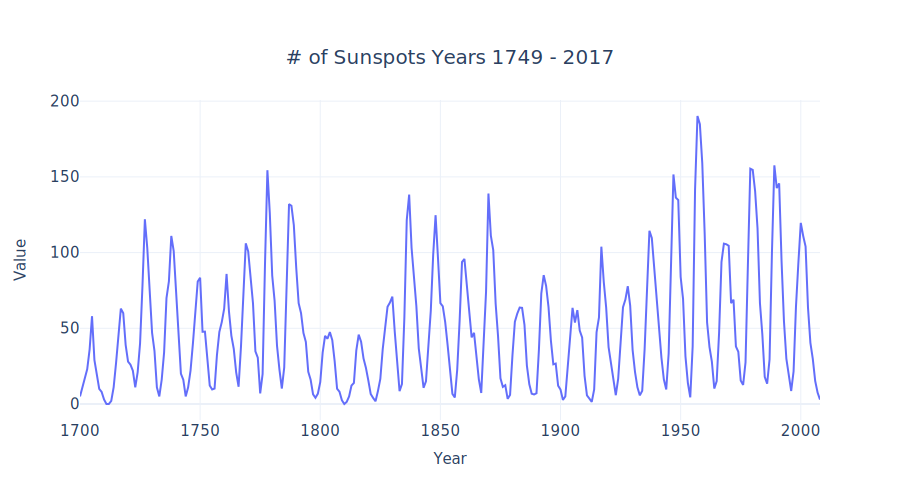

In [35]:
df = sm.datasets.sunspots.load_pandas().data
fig=px.line(df, x="YEAR", y="SUNACTIVITY", title="# of Sunspots Years 1749 - 2017")
fig = format_plot(fig, xlabel="Year")
fig.write_image("imgs/chapter_3/sunspots.png")
fig.show(renderer="svg")

In [36]:
df = pd.DataFrame({"x": np.arange(13)})

for i in range(1,4):
    df[f'Fourier Cosine Term {i}'] = np.cos((2 * np.pi * df.x * i) / 12)
    df[f'Fourier Sine Term {i}'] = np.sin((2 * np.pi * df.x * i) / 12)

df = pd.melt(df, id_vars="x",var_name="Fourier Terms")

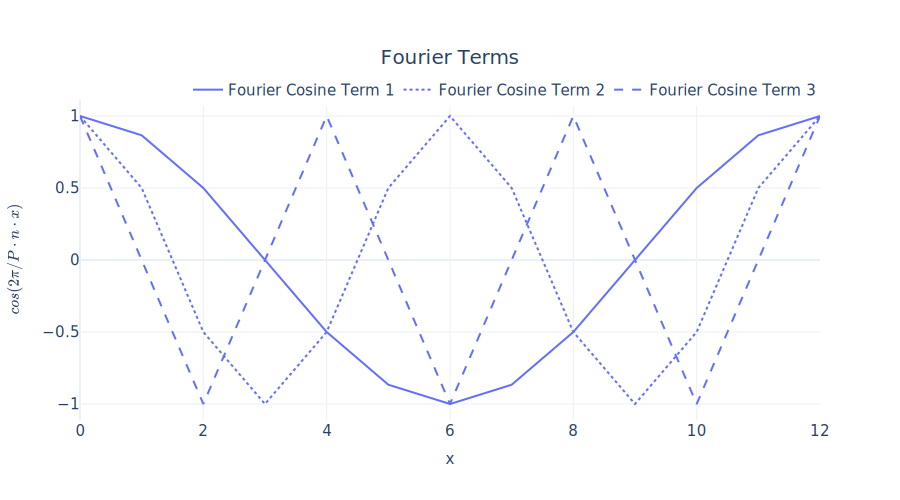

In [37]:
fig = px.line(df[df['Fourier Terms'].str.contains("Cosine")], x="x", y="value", line_dash="Fourier Terms", title="Fourier Terms")
fig = format_plot(fig, xlabel="x", ylabel="$cos(2\pi/P \cdot n \cdot x)$")
fig.write_image("imgs/chapter_3/fourier_terms.png")
fig.show(renderer="svg")

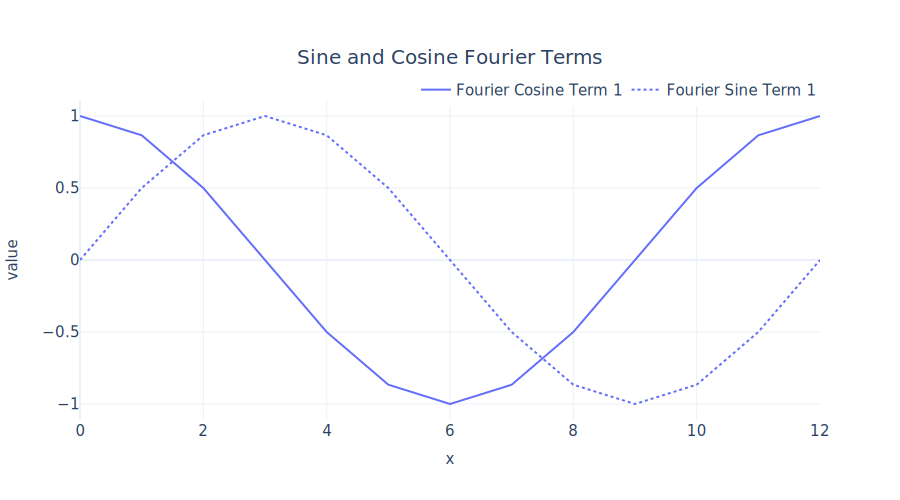

In [38]:
fig = px.line(df[df['Fourier Terms'].str.contains("Term 1")], x="x", y="value", line_dash="Fourier Terms", title="Sine and Cosine Fourier Terms")
fig = format_plot(fig, xlabel="x", ylabel="value")
fig.write_image("imgs/chapter_3/sine_cos_terms.png")
fig.show(renderer="svg")

# Reading Blocks 0-7

In [39]:
from src.utils.data_utils import compact_to_expanded

In [40]:
try:
    block_df = pd.read_parquet(preprocessed/"london_smart_meters_merged_block_0-7.parquet")
    display(block_df.head())
except FileNotFoundError:
    display(HTML("""
    <div class="alert alert-block alert-warning">
    <b>Warning!</b> File not found. Please make sure you have run 02 - Preprocessing London Smart Meter Dataset.ipynb in Chapter02
    </div>
    """))

,LCLid,start_timestamp,frequency,energy_consumption,series_length,stdorToU,Acorn,Acorn_grouped,file,holidays,...,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,MAC000002,2012-10-13,30min,"[0.263, 0.2689999999999999, 0.275, 0.256, 0.21...",24144,Std,ACORN-A,Affluent,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[186, 186, 188, 188, 190, 190, 203, 203, 206, ...","[8.78, 8.78, 8.27, 8.27, 7.87, 7.87, 7.89, 7.8...","[6.28, 6.28, 6.21, 6.21, 6.22, 6.22, 6.76, 6.7...","[1007.7, 1007.7, 1007.36, 1007.36, 1006.73, 10...","[7.55, 7.55, 7.34, 7.34, 6.75, 6.75, 6.89, 6.8...","[2.28, 2.28, 1.81, 1.81, 1.95, 1.95, 1.83, 1.8...","[rain, rain, rain, rain, rain, rain, rain, rai...","[clear-night, clear-night, clear-night, clear-...","[0.84, 0.84, 0.87, 0.87, 0.89, 0.89, 0.93, 0.9...","[Clear, Clear, Clear, Clear, Partly Cloudy, Pa..."
1,MAC000246,2012-01-01,30min,"[0.509, 0.317, 0.253, 0.249, 0.93, 0.607, 0.10...",37872,Std,ACORN-A,Affluent,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[229, 229, 238, 238, 229, 229, 231, 231, 227, ...","[12.12, 12.12, 12.59, 12.59, 12.45, 12.45, 12....","[10.97, 10.97, 11.02, 11.02, 11.04, 11.04, 10....","[1008.1, 1008.1, 1007.88, 1007.88, 1007.95, 10...","[12.12, 12.12, 12.59, 12.59, 12.45, 12.45, 12....","[5.9, 5.9, 6.06, 6.06, 5.31, 5.31, 4.68, 4.68,...","[rain, rain, rain, rain, rain, rain, rain, rai...","[partly-cloudy-night, partly-cloudy-night, clo...","[0.93, 0.93, 0.9, 0.9, 0.91, 0.91, 0.93, 0.93,...","[Mostly Cloudy, Mostly Cloudy, Overcast, Overc..."
2,MAC000450,2012-03-23,30min,"[1.337, 1.426, 0.996, 0.971, 0.994, 0.952, 0.8...",33936,Std,ACORN-A,Affluent,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[78, 78, 73, 73, 81, 81, 80, 80, 75, 75, 71, 7...","[8.76, 8.76, 8.54, 8.54, 8.09, 8.09, 7.34, 7.3...","[7.25, 7.25, 7.12, 7.12, 7.17, 7.17, 6.68, 6.6...","[1027.41, 1027.41, 1026.91, 1026.91, 1026.54, ...","[7.59, 7.59, 7.43, 7.43, 7.24, 7.24, 7.34, 7.3...","[2.18, 2.18, 2.07, 2.07, 1.72, 1.72, 1.34, 1.3...","[rain, rain, rain, rain, rain, rain, rain, rai...","[fog, fog, fog, fog, fog, fog, fog, fog, fog, ...","[0.9, 0.9, 0.91, 0.91, 0.94, 0.94, 0.96, 0.96,...","[Foggy, Foggy, Foggy, Foggy, Foggy, Foggy, Fog..."
3,MAC001074,2012-05-09,30min,"[0.18, 0.086, 0.106, 0.173, 0.146, 0.223, 0.21...",31680,ToU,ACORN-,ACORN-,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[215, 215, 207, 207, 215, 215, 216, 216, 126, ...","[11.46, 11.46, 11.38, 11.38, 11.38, 11.38, 10....","[10.23, 10.23, 10.17, 10.17, 10.24, 10.24, 10....","[1007.39, 1007.39, 1007.21, 1007.21, 1007.06, ...","[11.46, 11.46, 11.38, 11.38, 11.38, 11.38, 10....","[2.35, 2.35, 2.15, 2.15, 1.84, 1.84, 1.22, 1.2...","[rain, rain, rain, rain, rain, rain, rain, rai...","[partly-cloudy-night, partly-cloudy-night, par...","[0.92, 0.92, 0.92, 0.92, 0.93, 0.93, 0.95, 0.9...","[Partly Cloudy, Partly Cloudy, Mostly Cloudy, ..."
4,MAC003223,2012-09-18,30min,"[0.076, 0.079, 0.123, 0.109, 0.051, 0.069, 0.0...",25344,Std,ACORN-A,Affluent,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[236, 236, 240, 240, 242, 242, 244, 244, 248, ...","[14.06, 14.06, 13.12, 13.12, 12.53, 12.53, 12....","[10.82, 10.82, 10.29, 10.29, 9.86, 9.86, 9.83,...","[1011.09, 1011.09, 1010.82, 1010.82, 1010.65, ...","[14.06, 14.06, 13.12, 13.12, 12.53, 12.53, 12....","[3.86, 3.86, 3.81, 3.81, 4.27, 4.27, 4.12, 4.1...","[rain, rain, rain, rain, rain, rain, rain, rai...","[clear-night, clear-night, clear-night, clear-...","[0.81, 0.81, 0.83, 0.83, 0.84, 0.84, 0.86, 0.8...","[Clear, Clear, Clear, Clear, Clear, Clear, Par..."


Let's take all the consumers in one block for our exercise. Keep in mind, you can do the same with more number of blocks as long as it fits in your RAM

In [41]:
#Converting to expanded form
exp_block_df = compact_to_expanded(block_df[block_df.file=="block_7"], timeseries_col = 'energy_consumption',
static_cols = ["frequency", "series_length", "stdorToU", "Acorn", "Acorn_grouped", "file"],
time_varying_cols = ['holidays', 'visibility', 'windBearing', 'temperature', 'dewPoint',
       'pressure', 'apparentTemperature', 'windSpeed', 'precipType', 'icon',
       'humidity', 'summary'],
ts_identifier = "LCLid")

exp_block_df.head()

  0%|          | 0/50 [00:00<?, ?it/s]

,timestamp,LCLid,energy_consumption,frequency,series_length,stdorToU,Acorn,Acorn_grouped,file,holidays,...,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,2012-01-01 00:00:00,MAC000050,0.175,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,229,12.12,10.97,1008.10,12.12,5.90,rain,partly-cloudy-night,0.93,Mostly Cloudy
1,2012-01-01 00:30:00,MAC000050,0.212,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,229,12.12,10.97,1008.10,12.12,5.90,rain,partly-cloudy-night,0.93,Mostly Cloudy
2,2012-01-01 01:00:00,MAC000050,0.313,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,238,12.59,11.02,1007.88,12.59,6.06,rain,cloudy,0.90,Overcast
3,2012-01-01 01:30:00,MAC000050,0.302,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,238,12.59,11.02,1007.88,12.59,6.06,rain,cloudy,0.90,Overcast
4,2012-01-01 02:00:00,MAC000050,0.257,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,229,12.45,11.04,1007.95,12.45,5.31,rain,partly-cloudy-night,0.91,Mostly Cloudy


In [42]:
# Taking a single time series from the block
ts_df = exp_block_df[exp_block_df.LCLid=="MAC000193"].set_index("timestamp")

## Fill in missing values

Let's fill in missing values because some of the decomposition techniques does not support missing values.

In [43]:
from src.imputation.interpolation import SeasonalInterpolation
ts = SeasonalInterpolation(seasonal_period=48*7).fit_transform(ts_df.energy_consumption.values.reshape(-1,1)).squeeze()

# Seasonal Decomposition

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
from src.decomposition.seasonal import STL, FourierDecomposition, MultiSeasonalDecomposition

In [45]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def decomposition_plot(
        ts_index, observed=None, seasonal=None, trend=None, resid=None
    ):
        """Plots the decomposition output
        """
        series = []
        if observed is not None:
            series += ["Original"]
        if trend is not None:
            series += ["Trend"]
        if seasonal is not None:
            series += ["Seasonal"]
        if resid is not None:
            series += ["Residual"]
        if len(series) == 0:
            raise ValueError(
                "All component flags were off. Need atleast one of the flags turned on to plot."
            )
        fig = make_subplots(
            rows=len(series), cols=1, shared_xaxes=True, subplot_titles=series
        )
        x = ts_index
        row = 1
        if observed is not None:
            fig.append_trace(
                go.Scatter(x=x, y=observed, name="Original"), row=row, col=1
            )
            row += 1
        if trend is not None:
            fig.append_trace(
                go.Scatter(x=x, y=trend, name="Trend"), row=row, col=1
            )
            row += 1
        if seasonal is not None:
            fig.append_trace(
                go.Scatter(x=x, y=seasonal, name="Seasonal"),
                row=row,
                col=1,
            )
            row += 1
        if resid is not None:
            fig.append_trace(
                go.Scatter(x=x, y=resid, name="Residual"), row=row, col=1
            )
            row += 1

        fig.update_layout(
            title_text="Seasonal Decomposition",
            autosize=False,
            width=1200,
            height=700,
            title={"x": 0.5, "xanchor": "center", "yanchor": "top"},
            titlefont={"size": 20},
            legend_title=None,
            showlegend=False,
            legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            )
        )
        return fig

## Moving Averages

In [46]:
#Does not support misssing values, so using imputed ts instead
res = seasonal_decompose(ts, period=7*48, model="additive", extrapolate_trend="freq", filt=np.repeat(1/(30*48), 30*48))

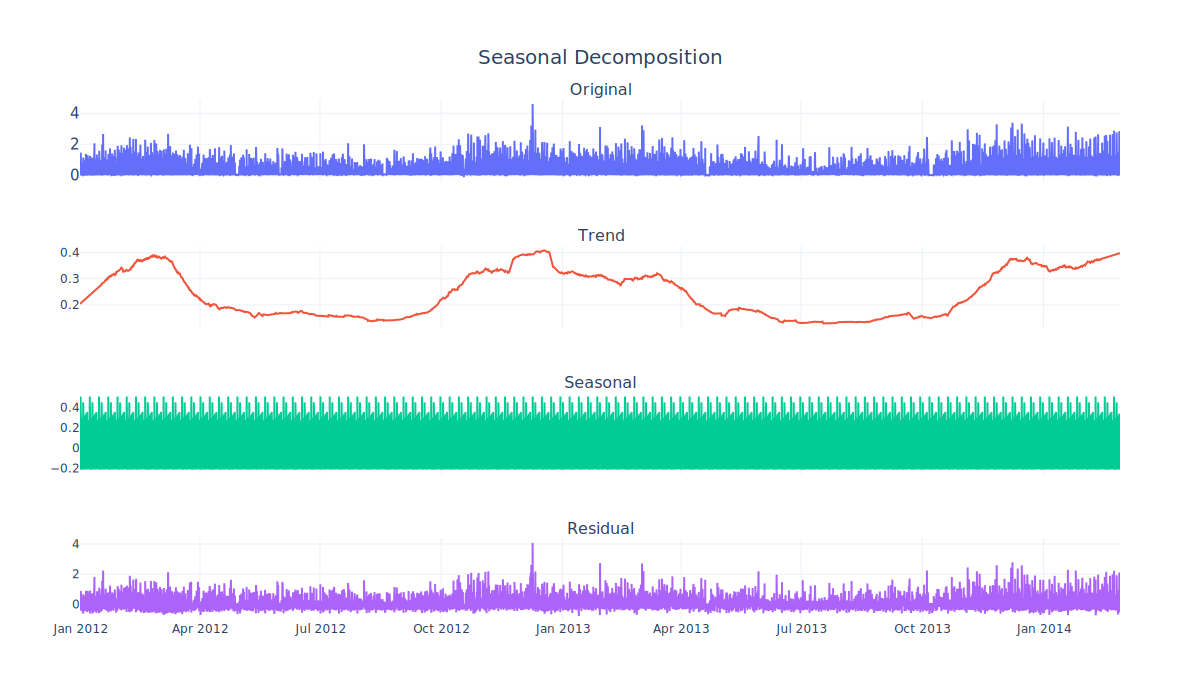

In [47]:
fig = decomposition_plot(ts_df.index, res.observed, res.seasonal, res.trend, res.resid)
fig.write_image("imgs/chapter_3/moving_avg_decomposition.png")
fig.show(renderer="svg")

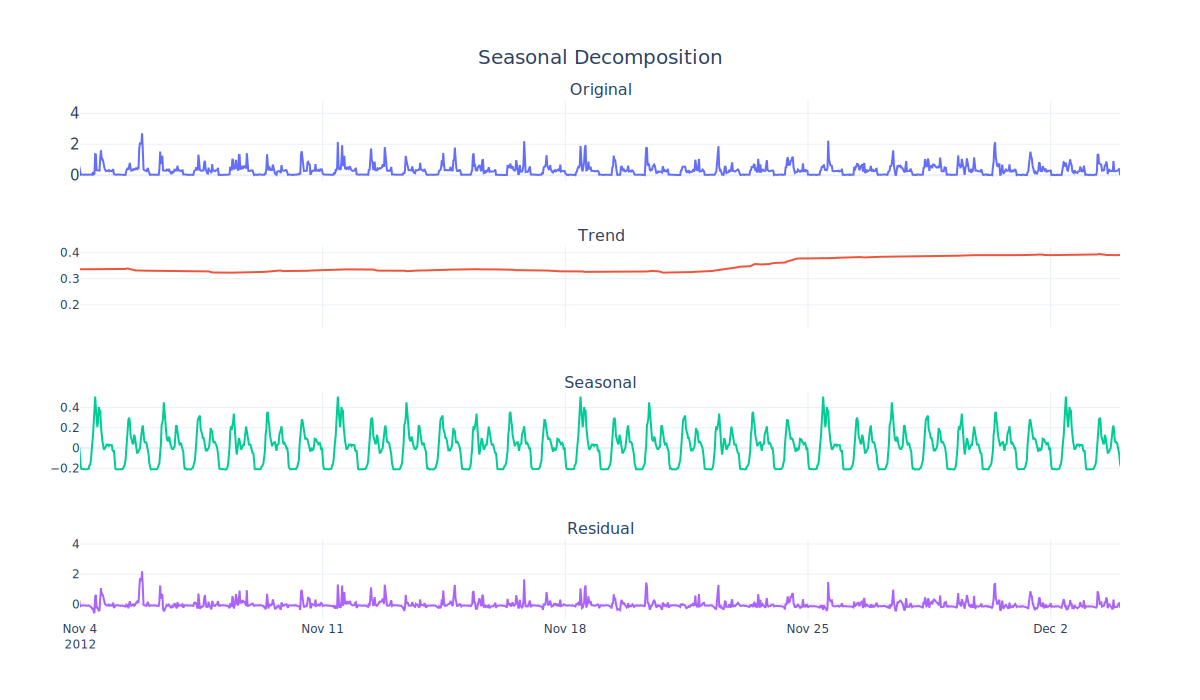

In [48]:
#Let's zoom in on a few days to better see the seasonality extracted
fig.update_xaxes(type="date", range=["2012-11-4", "2012-12-4"])
fig.write_image("imgs/chapter_3/moving_avg_decomposition_zoomed.png")
fig.show(renderer="svg")

## Seasonality and Trend Decomposition using Loess (STL)

In [49]:
#Supports missing values and expects a series or dataframe with datetime index
stl = STL(seasonality_period=7*48, model = "additive")
res_new = stl.fit(ts_df.energy_consumption)

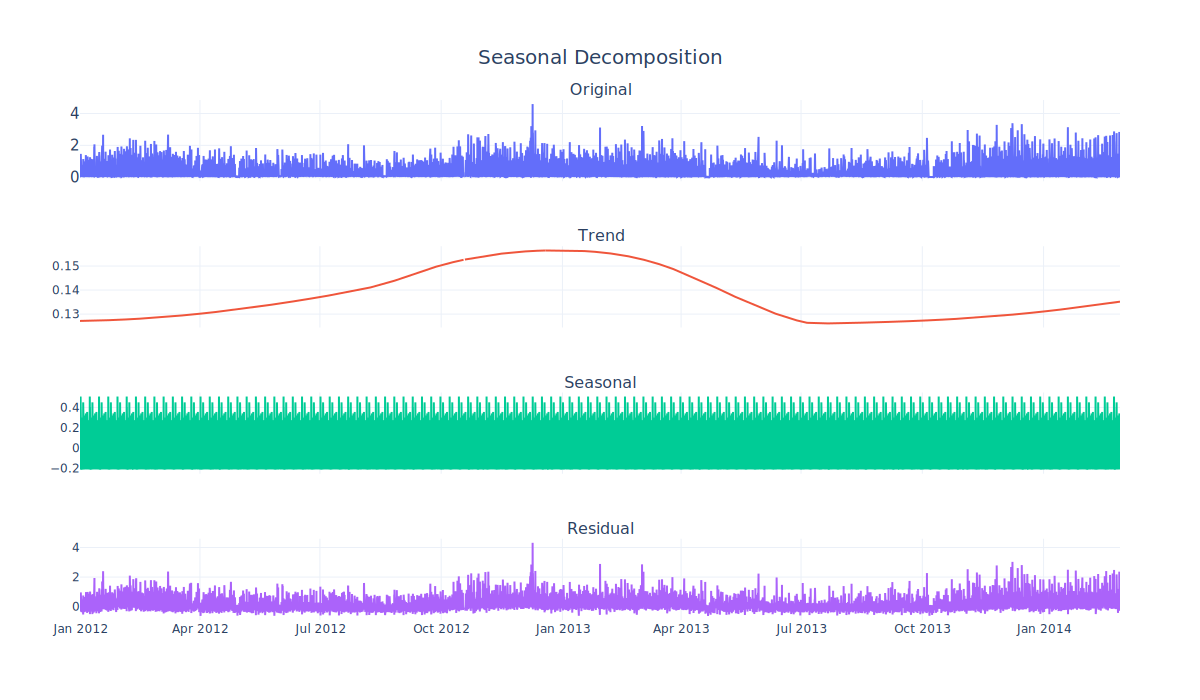

In [50]:
fig = res_new.plot(interactive=True)
fig.update_layout(
            legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            )
        )
fig.write_image("imgs/chapter_3/stl_decomposition.png")
fig.show(renderer="svg")

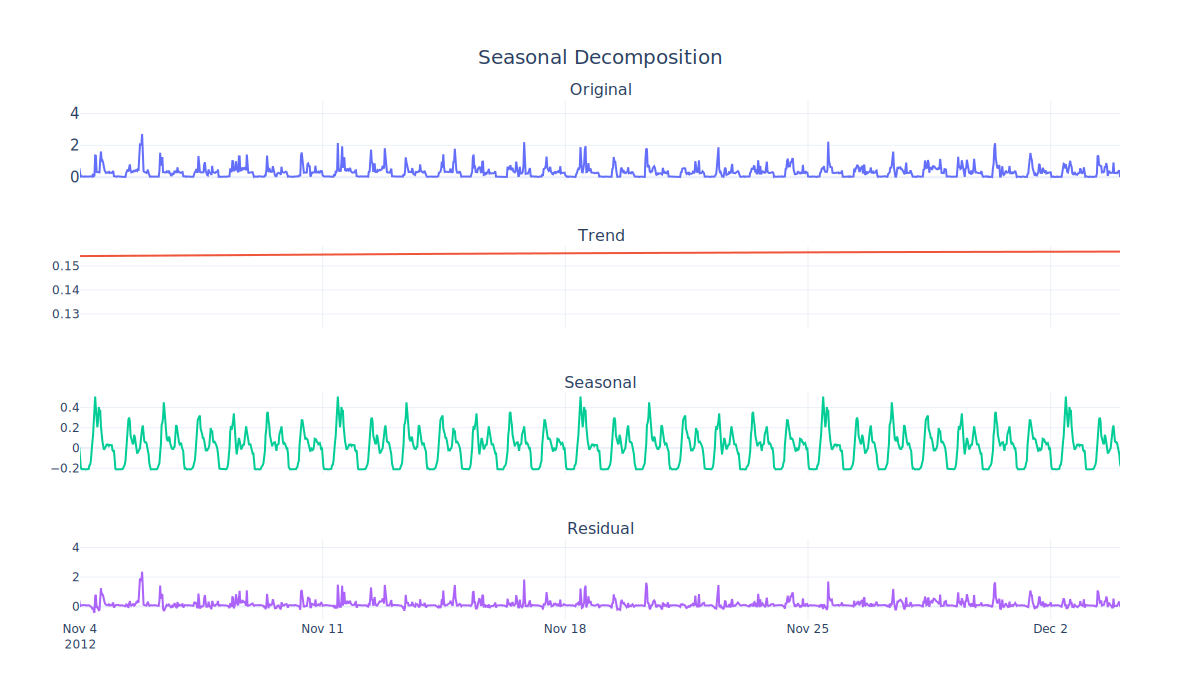

In [51]:
#Let's zoom in on a few days to better see the seasonality extracted
fig.update_xaxes(type="date", range=["2012-11-4", "2012-12-4"])
fig.write_image("imgs/chapter_3/stl_decomposition_zoomed.png")
fig.show(renderer="svg")

## Seasonality and Trend Decomposition using Loess and Fourier Terms (Fourier Decomposition)

In [52]:
#Doesn't support missing values, and expects a series or datafeame with datetime index
stl = FourierDecomposition(seasonality_period="hour", model = "additive", n_fourier_terms=5)
res_new = stl.fit(pd.Series(ts.squeeze(), index=ts_df.index))

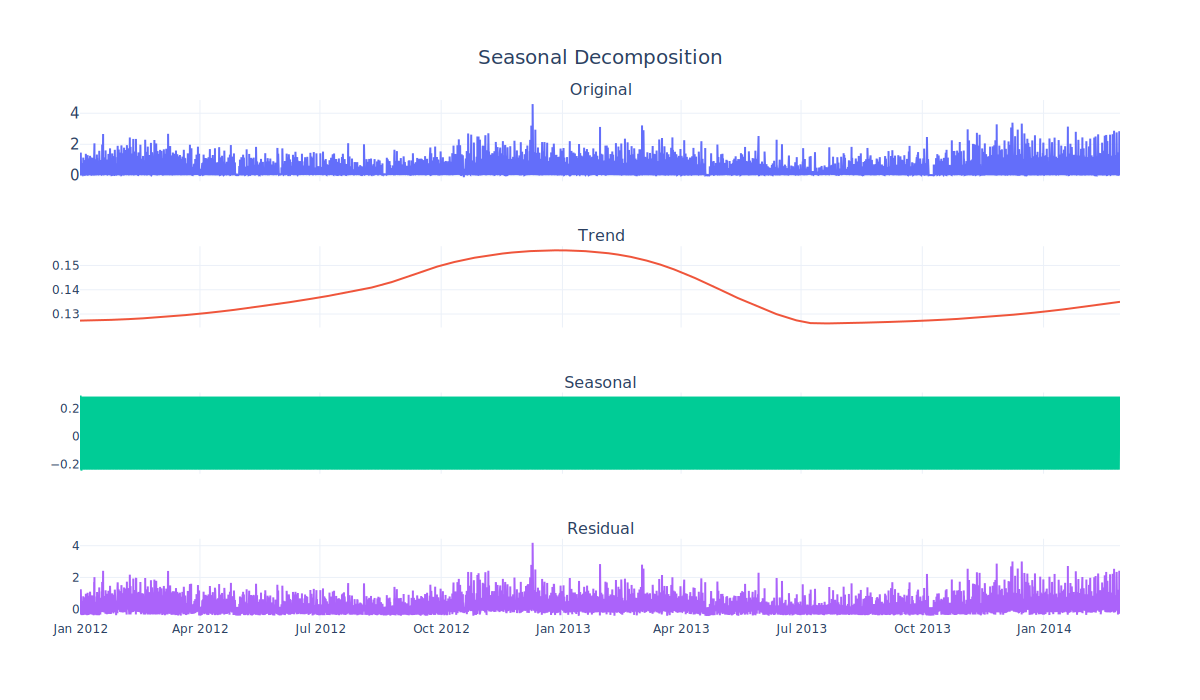

In [53]:
fig = res_new.plot(interactive=True)
fig.update_layout(
            legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            )
        )
fig.write_image("imgs/chapter_3/fourier_decomposition_hourly.png")
fig.show(renderer="svg")

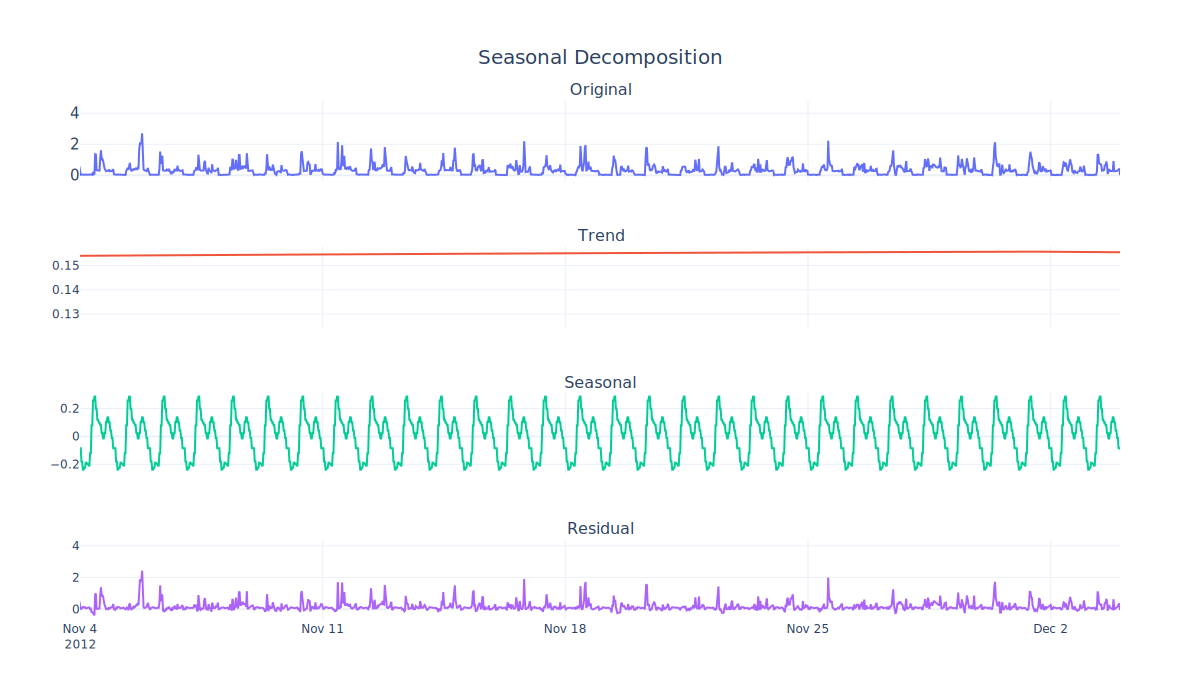

In [54]:
fig.update_xaxes(type="date", range=["2012-11-4", "2012-12-4"])
fig.write_image("imgs/chapter_3/fourier_decomposition_hourly_zoomed.png")
fig.show(renderer="svg")

### Custom Seasonality

In [55]:
#Making a custom seasonality term
ts_df["dayofweek"] = ts_df.index.dayofweek
ts_df["hour"] = ts_df.index.hour
#Creating a sorted unique combination df
map_df = ts_df[["dayofweek","hour"]].drop_duplicates().sort_values(["dayofweek", "hour"])
# Assigning an ordinal variable to capture the order
map_df["map"] = np.arange(1, len(map_df)+1)
# mapping the oprdinal mapping back to the original df and getting the seasonality array
seasonality = ts_df.merge(map_df, on=["dayofweek","hour"], how='left', validate="many_to_one")['map']

In [56]:
stl = FourierDecomposition(model = "additive", n_fourier_terms=50)
res_new = stl.fit(pd.Series(ts, index=ts_df.index), seasonality=seasonality)

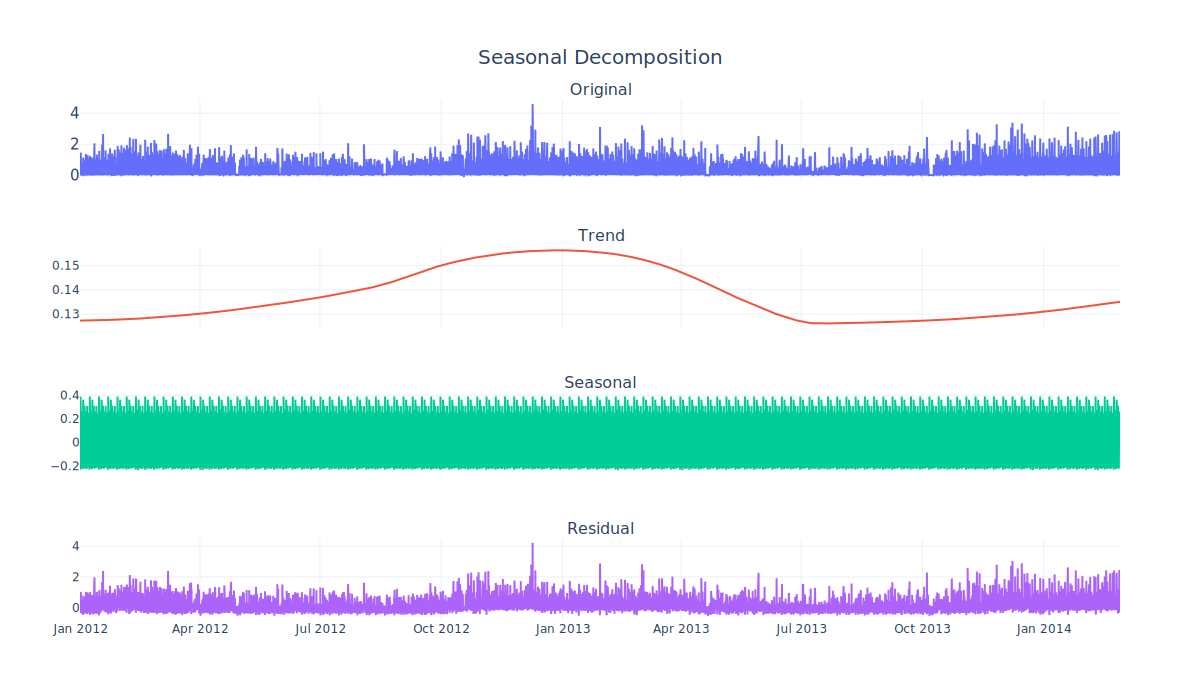

In [57]:
fig = res_new.plot(interactive=True)
fig.update_layout(
            legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            )
        )
fig.write_image("imgs/chapter_3/fourier_decomposition.png")
fig.show(renderer="svg")

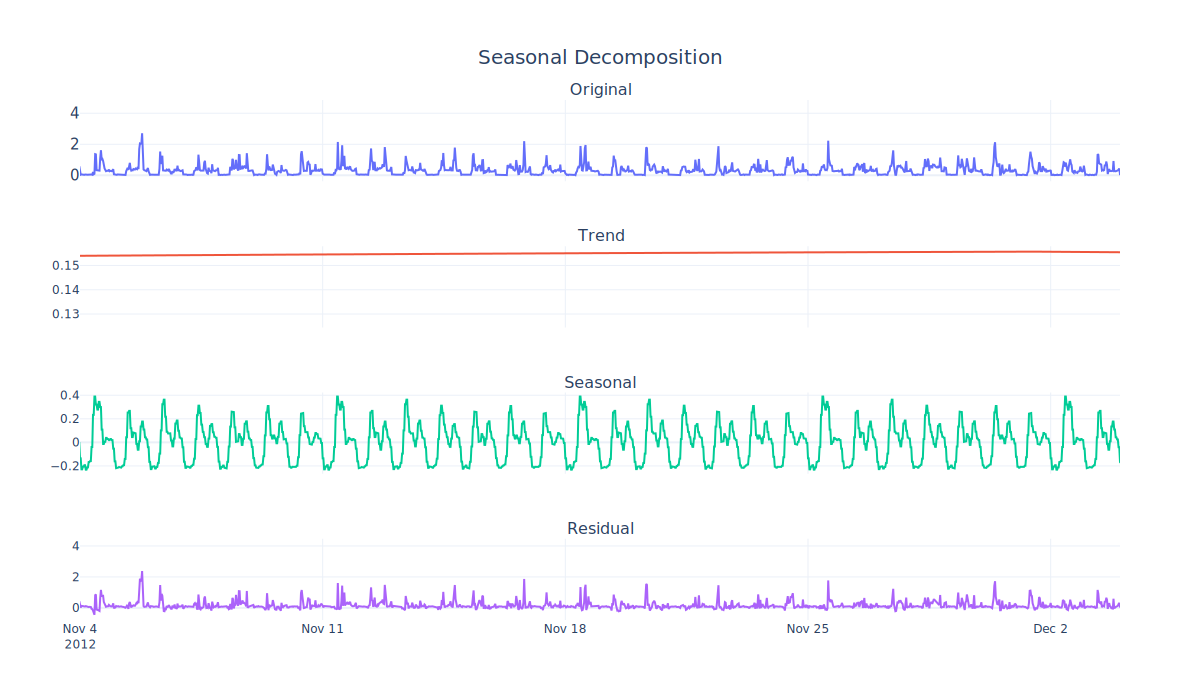

In [58]:
fig.update_xaxes(type="date", range=["2012-11-4", "2012-12-4"])
fig.write_image("imgs/chapter_3/fourier_decomposition_zoomed.png")
fig.show(renderer="svg")

## Multiple Seasonality Decomposition using Loess (MSTL)

### Using Averages as the seasonal model

In [59]:
stl = MultiSeasonalDecomposition(seasonal_model="averages",seasonality_periods=[48*365, 48*7, 48], model = "additive")
res_new = stl.fit(pd.Series(ts, index=ts_df.index))

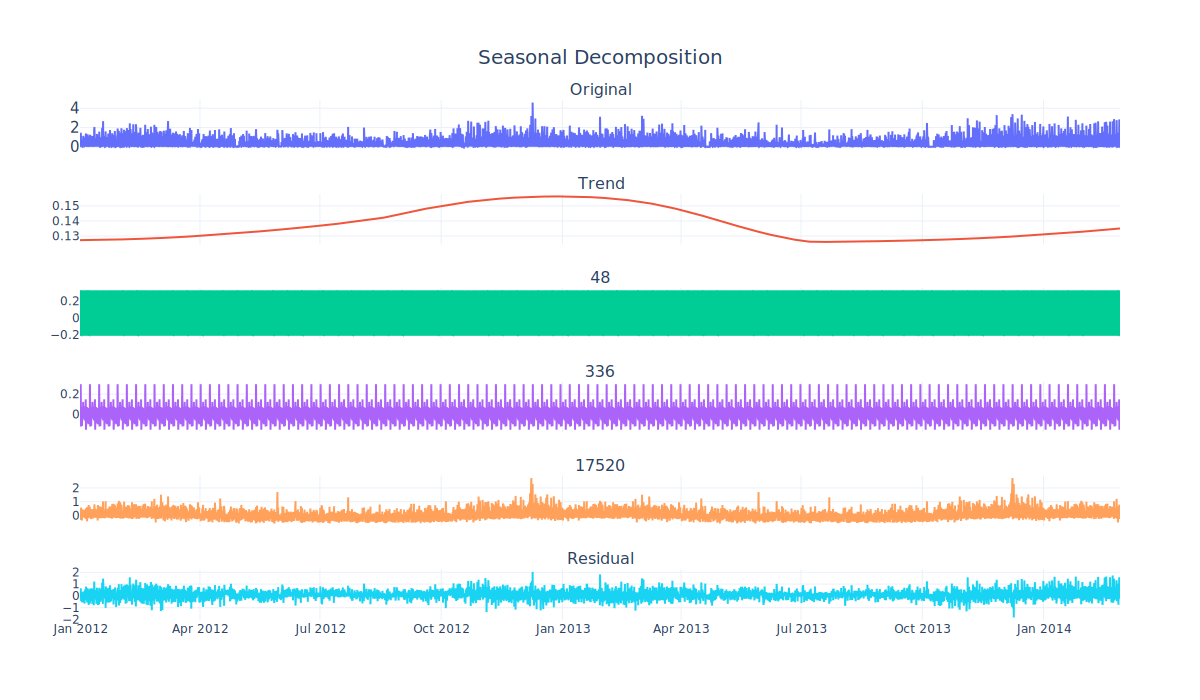

In [60]:
fig = res_new.plot(interactive=True)
fig.update_layout(
            legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            )
        )
fig.write_image("imgs/chapter_3/mstl_decomposition_averages.png")
fig.show(renderer="svg")

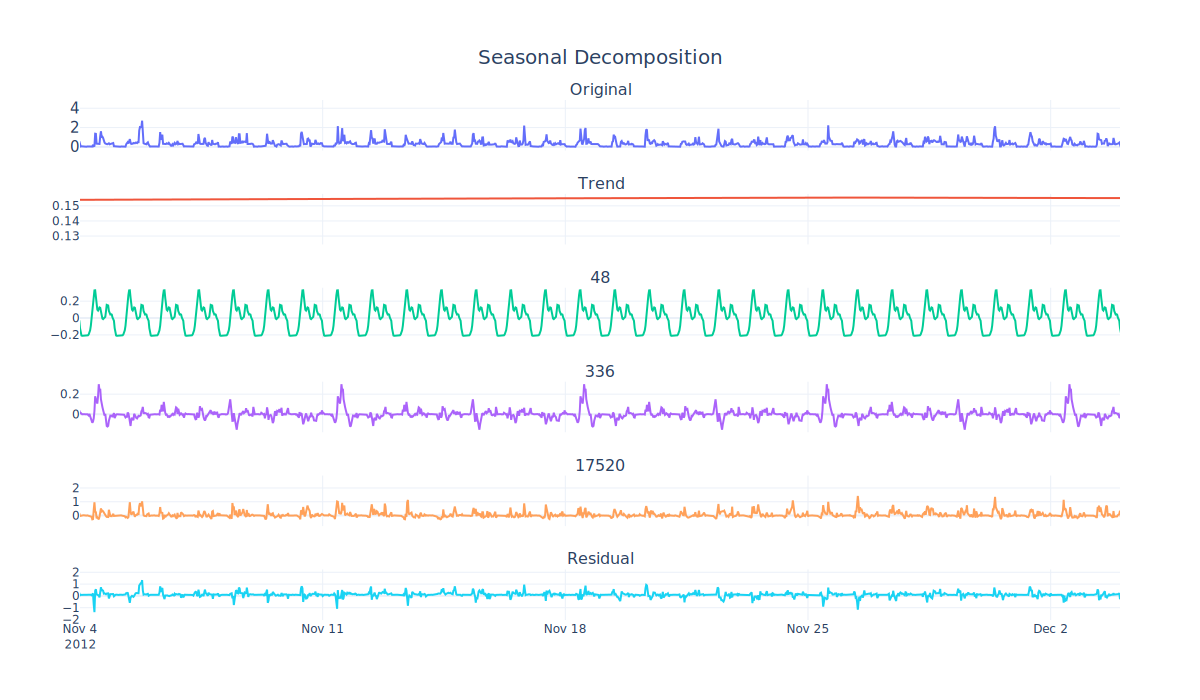

In [61]:
fig.update_xaxes(type="date", range=["2012-11-4", "2012-12-4"])
fig.write_image("imgs/chapter_3/mstl_decomposition_averages_zoomed.png")
fig.show(renderer="svg")

### Using Fourier Decomposition as seasonal model

In [62]:
stl = MultiSeasonalDecomposition(seasonal_model="fourier",seasonality_periods=["day_of_year", "day_of_week", "hour"], model = "additive", n_fourier_terms=10)
res_new = stl.fit(pd.Series(ts, index=ts_df.index))

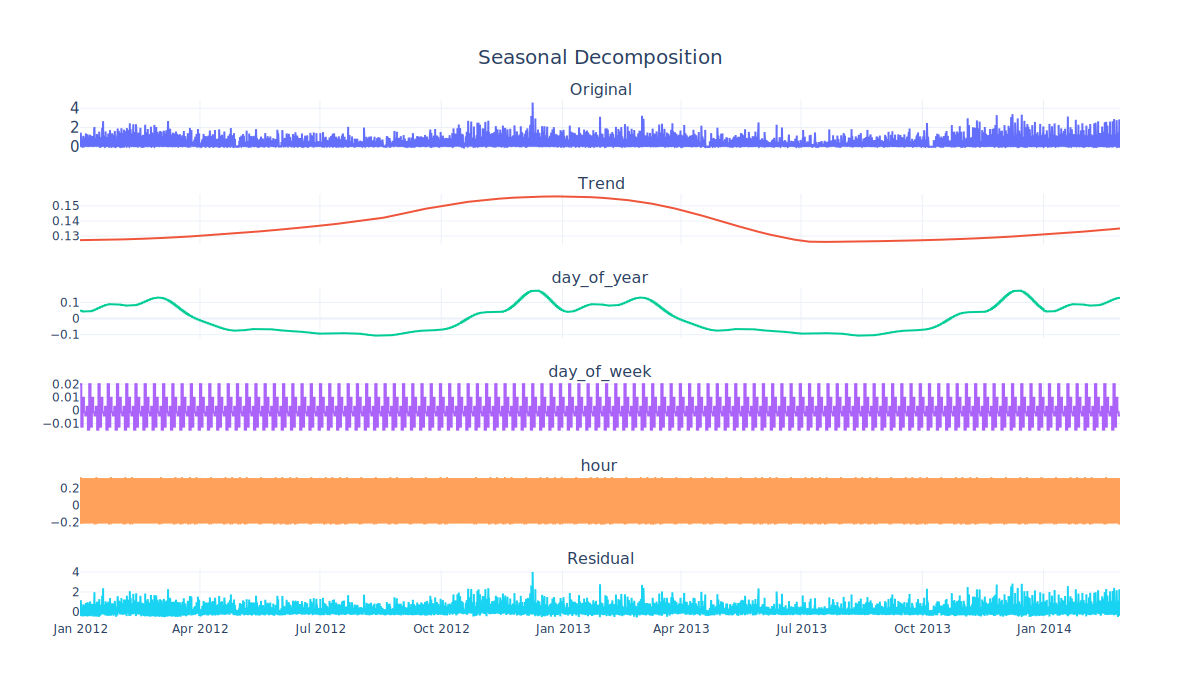

In [63]:
fig = res_new.plot(interactive=True)
fig.update_layout(
            legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            )
        )
fig.write_image("imgs/chapter_3/mstl_decomposition_fourier.png")
fig.show(renderer="svg")

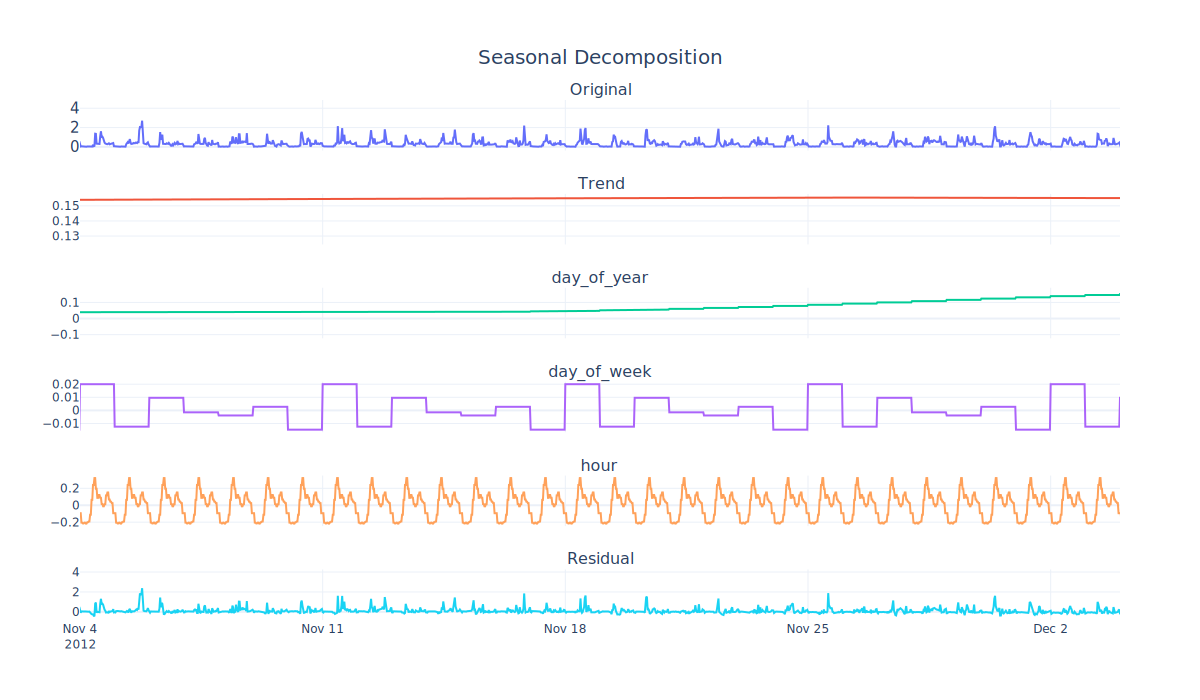

In [64]:
fig.update_xaxes(type="date", range=["2012-11-4", "2012-12-4"])
fig.write_image("imgs/chapter_3/mstl_decomposition_fourier_zoomed.png")
fig.show(renderer="svg")